# Car Total Sales Forecasting using ARIMA and SARIMA

In this notebook i want to share how to make forecasting on car total_sales using ARIMA and SARIMA

- Author Name : Kaffatufiddin
- Linkedin : [Kaffatufiddin](https://www.linkedin.com/in/kaffatufiddin/)
- Medium : [Kaffatufiddin](https://medium.com/@maskaff) 


# Data Preparation

In [1]:
# Data Manipulation
import pandas as pd  
import numpy as np  
import datetime as dt

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.graph_objects as go  

# Time Series Analysis and Modelling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX   
from pmdarima import auto_arima  # autoarima  
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

In [2]:
# Data Load
df_car = pd.read_csv("car_sales.csv")
df_car.head()

,date,car_sold,total_sales,avg_price
0,1/31/2020,900,39150000,43500
1,2/29/2020,950,41325000,43500
2,3/31/2020,945,41391000,43800
3,4/30/2020,1000,44000000,44000
4,5/31/2020,1150,51175000,44500


## About Data Features Description

Data is a dummy data about car sales in a dealer in a region.

- `date` is representing each month
- `car_sold` is representing total quantity sold per month
- `total_sales` is representing total sales per month, stated in USD
- `avg_price` is representing avg price of the car per transaction, stated in USD
  

In [3]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         60 non-null     object
 1   car_sold     60 non-null     int64 
 2   total_sales  60 non-null     int64 
 3   avg_price    60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


date is still considered as object, we need to change to datetime

## Change `date` to datetime format

In [4]:
df_car['date'] = pd.to_datetime(df_car['date'], format='%m/%d/%Y')  
df_car.set_index('date', inplace=True)  

In [5]:
df_car.describe()

,car_sold,total_sales,avg_price
count,60.000000,6.000000e+01,60.000000
mean,1188.550000,5.642132e+07,47393.333333
std,103.115276,6.107361e+06,1700.858872
min,900.000000,3.915000e+07,43500.000000
25%,1120.000000,5.301750e+07,46275.000000
50%,1200.000000,5.752200e+07,47900.000000
75%,1250.000000,5.940600e+07,48787.500000
max,1420.000000,7.057400e+07,49700.000000


## Total Sales Visualization

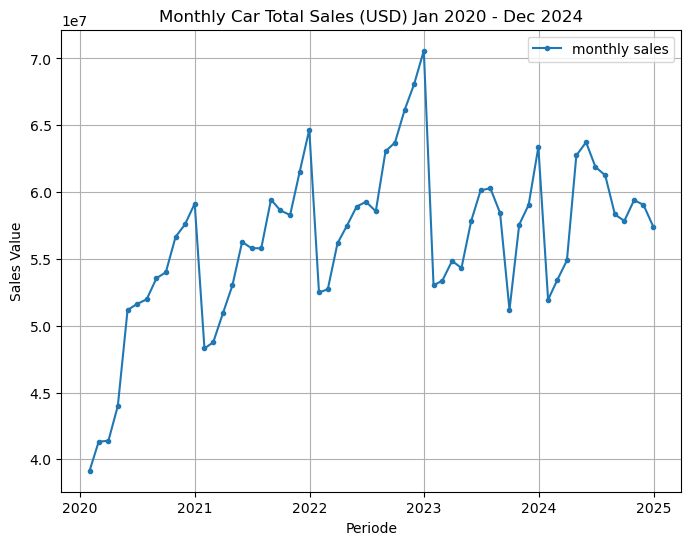

In [6]:
# Visualization
plt.figure(figsize=(8, 6))  
plt.plot(df_car['total_sales'], label='monthly sales', marker='.')  
plt.title("Monthly Car Total Sales (USD) Jan 2020 - Dec 2024")
plt.xlabel('Periode')  
plt.ylabel('Sales Value')  
plt.legend()
plt.grid()  
plt.show()  

## Differencing

Differencing is the process of transforming a time series dataset to make it stationary. A stationary time series has constant mean and variance over time, which is a crucial assumption for many time series forecasting models, including ARIMA.

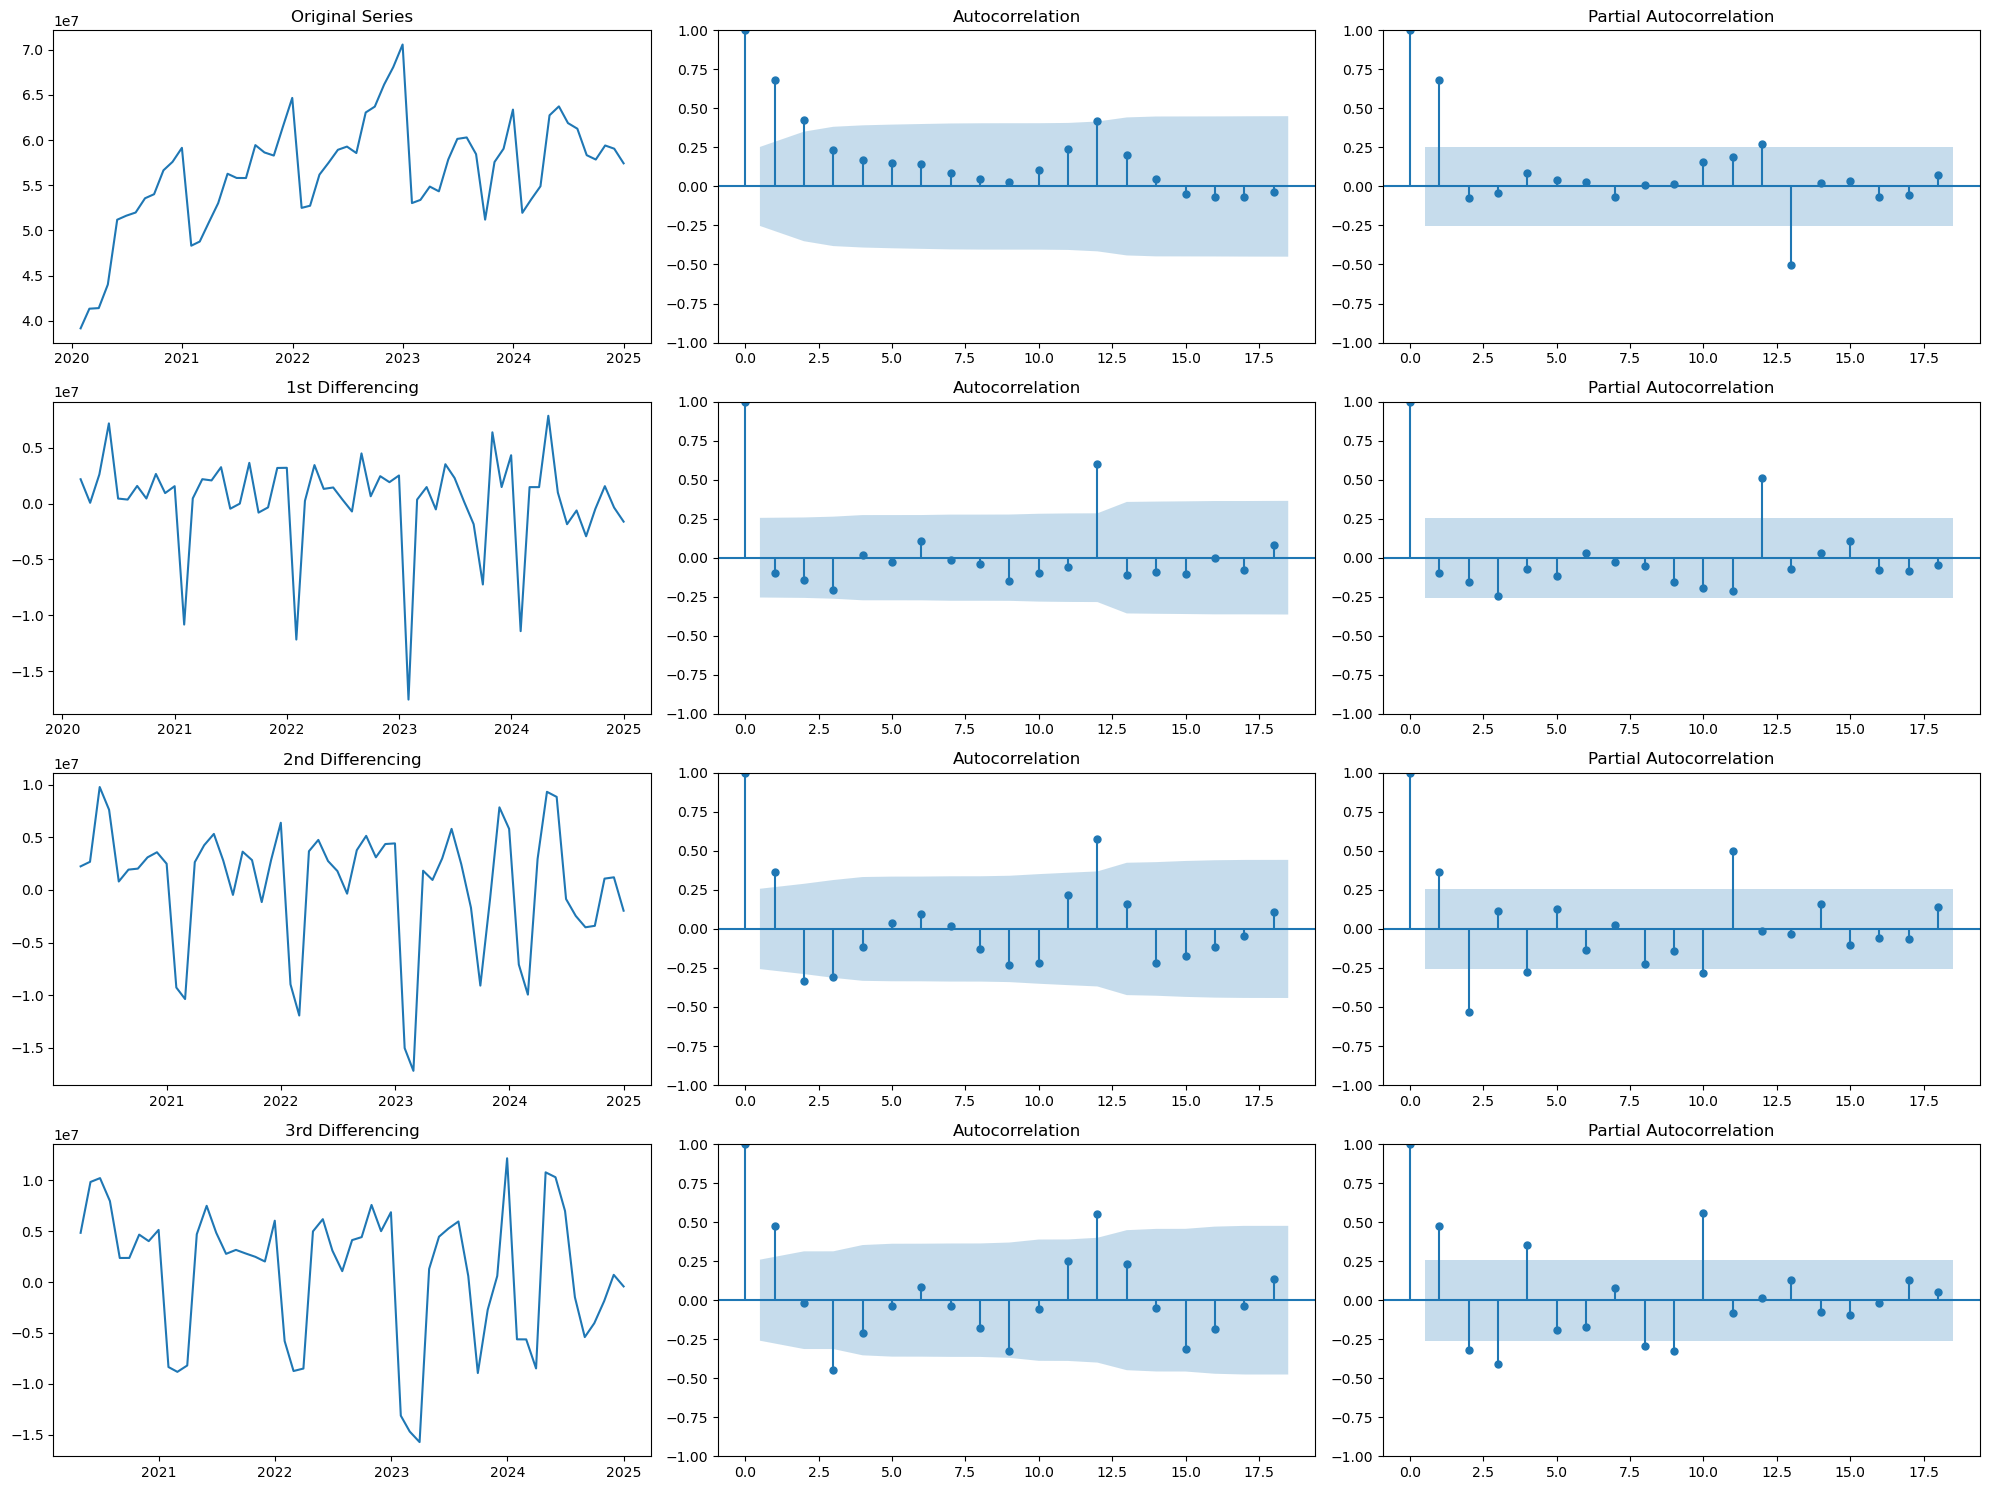

In [7]:
def acf_pacf(data, fitur):
    fig, axes = plt.subplots(4, 3, figsize=(20, 15)) 
    # Original Series
    axes[0, 0].plot(data[fitur]); axes[0, 0].set_title('Original Series')
    plot_acf(data[fitur], ax=axes[0, 1])
    plot_pacf(data[fitur], ax=axes[0, 2])

    # 1st Differencing
    axes[1, 0].plot(data[fitur].diff(1)); axes[1, 0].set_title('1st Differencing')
    plot_acf(data[fitur].diff(1).dropna(), ax=axes[1, 1])
    plot_pacf(data[fitur].diff(1).dropna(), ax=axes[1, 2])

    # 2nd Differencing
    axes[2, 0].plot(data[fitur].diff(2)); axes[2, 0].set_title('2nd Differencing')
    plot_acf(data[fitur].diff(2).dropna(), ax=axes[2, 1])
    plot_pacf(data[fitur].diff(2).dropna(), ax=axes[2, 2])

    # 3rd Differencing
    axes[3, 0].plot(data[fitur].diff(3)); axes[3, 0].set_title('3rd Differencing')
    plot_acf(data[fitur].diff(3).dropna(), ax=axes[3, 1])
    plot_pacf(data[fitur].diff(3).dropna(), ax=axes[3, 2])

    plt.tight_layout()
    plt.show()

# Use Function
acf_pacf(df_car, 'total_sales')


# 1. ARIMA

**ARIMA = AutoRegressive Integrated Moving Average.**

A statistical analysis model that forecasts future data points by examining differences between values within a series.


## Data Splitting

In [8]:
# Data Splitting

train = df_car['total_sales'][:-6]  # All data, except 6 last data
test = df_car['total_sales'][-6:]   # 6 Last data

## ARIMA Modelling

In [9]:
# ARIMA modelling
freq = "ME"  # Replace with "W" for weekly, "M" for monthly, etc.
model = ARIMA(train, order=(0, 1, 1), freq=freq)
model_fit = model.fit()

c:\Users\MSKF\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


## ARIMA Forecast

In [10]:
# forecast model
forecast = model_fit.forecast(steps = 6) # 6 bulan ke depan
forecast

2024-07-31    6.189263e+07
2024-08-31    6.189263e+07
2024-09-30    6.189263e+07
2024-10-31    6.189263e+07
2024-11-30    6.189263e+07
2024-12-31    6.189263e+07
Freq: ME, Name: predicted_mean, dtype: float64

## Visualization

In [11]:
# Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_car.index, y=df_car['total_sales'], mode='lines', name='Actual'))  # Data asli
fig.add_trace(go.Scatter(x=test.index, y=forecast, mode='lines', name='Forecast'))  # Hasil prediksi untuk test set
fig.update_layout(title='ARIMA Forecast vs Actual (Testing Data)', xaxis_title='Time', yaxis_title='total_sales')
fig.show()

# RMSE
mse = mean_squared_error(test, forecast)
print(f"RMSE from the last 6 data is {mse ** 0.5}")

RMSE from the last 6 data is 3264869.356893684


# 2. AUTOARIMA

AutoARIMA is an automated version of ARIMA that finds the best model parameters (p, d, q) by testing multiple ARIMA models with different parameters and choosing the one with the lowest error. This is particularly helpful when the user does not know the appropriate parameters for the time series.

## Data Splitting

In [12]:
# Data Splitting

train = df_car['total_sales'][:-6] 
test = df_car['total_sales'][-6:]

## Auto ARIMA Modelling

In [13]:
# Model
model = auto_arima(train)

## Best order

In [14]:
# The Best Order
model.order

(0, 1, 0)

In [15]:
# Forecast
forecast = model.predict(n_periods = 6)
forecast

2024-07-31    61875000.0
2024-08-31    61875000.0
2024-09-30    61875000.0
2024-10-31    61875000.0
2024-11-30    61875000.0
2024-12-31    61875000.0
Freq: ME, dtype: float64

In [16]:
# Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_car.index, y=df_car['total_sales'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=forecast, mode='lines', name='Forecast'))
fig.update_layout(title='ARIMA Forecast vs Actual (Testing Data)', xaxis_title='Time', yaxis_title='total_sales')
fig.show()

# Hitung RMSE antara hasil prediksi dan data testing
mse = mean_squared_error(test, forecast)
print(f"RMSE from the 6 data test is {mse ** 0.5}")

RMSE from the 6 data test is 3248598.826160801


# 3. Rolling Forecast Origin (AutoARIMA)

Rolling Forecast Origin is a forecasting method where the model is re-estimated for every new data point, using a rolling window of past observations. Essentially, you recalibrate the model as new data becomes available, to make predictions. This approach helps in keeping the forecasts updated with the most recent information.

## Data Splitting

In [17]:
# data splitting

train = df_car['total_sales'][:-6]  # Anything but the last 6
test = df_car['total_sales'][-6:]   # The last 6 data for testing

In [18]:
# Modelling

history = list(train)  # This will save the data for training
predictions = []  # List for saving prediction

for t in range(len(test)):
    # Model with AutoARIMA
    model = auto_arima(history, seasonal=False, stepwise=True)

    # Predicting for the next 1 data
    forecast = model.predict(n_periods=1)[0]

    # Save prediction
    predictions.append(forecast)

    # Add the prediction to training
    history.append(test.iloc[t])

## Visualization

In [19]:
# Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_car.index, y=df_car['total_sales'], mode='lines', name='Actual'))  # Data asli
fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name='Rolling Forecast'))  # Hasil prediksi rolling
fig.update_layout(title='Rolling Forecast vs Actual (Testing Data)', xaxis_title='Time', yaxis_title='total_sales')
fig.show()

# RMSE
mse = mean_squared_error(test, predictions)
print(f"RMSE from rolling forecast for last 6 data {mse ** 0.5}")

RMSE from rolling forecast for last 6 data 1548486.4115214788


# 4. SARIMA

**SARIMA = Seasonal AutoRegressive Integrated Moving Average.**

## Differencing

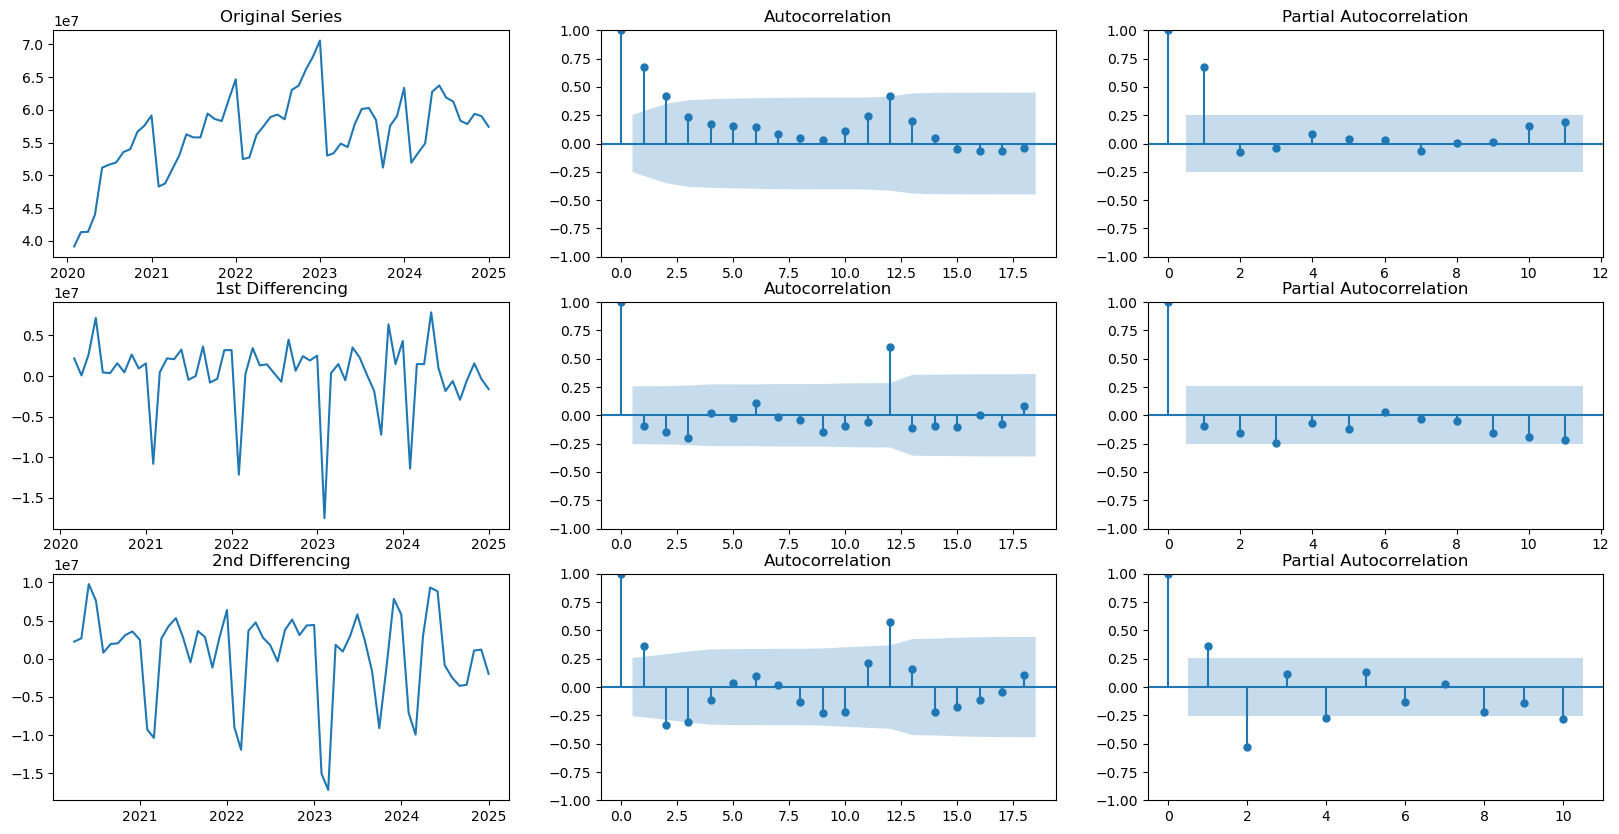

In [20]:
# Original
fig, axes = plt.subplots(3,3, figsize = (20,10))
axes[0, 0].plot(df_car['total_sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_car['total_sales'], ax=axes[0, 1])
plot_pacf(df_car['total_sales'], lags = 11, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_car['total_sales'].diff(1)); axes[1, 0].set_title('1st Differencing')
plot_acf(df_car['total_sales'].diff(1).dropna(), ax=axes[1, 1])
plot_pacf(df_car['total_sales'].diff(1).dropna(),lags = 11, ax=axes[1, 2])


# 2nd Differencing
axes[2, 0].plot(df_car['total_sales'].diff(2)); axes[2, 0].set_title('2nd Differencing')
plot_acf(df_car['total_sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_car['total_sales'].diff(2).dropna(),lags = 10, ax=axes[2, 2])

plt.show()

## Data Splitting

In [21]:
# Data Splitting
train = df_car['total_sales'][:-12]
test = df_car['total_sales'][-12:]

## Modelling

In [22]:
model = auto_arima(train, seasonal = True, m = 12) # Seasonal 12 month

## Best Order

In [23]:
# The best order
model.order

(0, 1, 1)

## Forecasting

In [24]:
# Forecasting
forecast = model.predict(n_periods=12)
forecast

2024-01-31    4.589114e+07
2024-02-29    4.624264e+07
2024-03-31    4.771664e+07
2024-04-30    4.719114e+07
2024-05-31    5.071114e+07
2024-06-30    5.299614e+07
2024-07-31    5.315664e+07
2024-08-31    5.130664e+07
2024-09-30    4.405864e+07
2024-10-31    5.043514e+07
2024-11-30    5.191114e+07
2024-12-31    5.623864e+07
Freq: ME, dtype: float64

## Visualization

In [25]:
# Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_car.index, y=df_car['total_sales'], mode='lines', name='Actual'))  # Data asli
fig.add_trace(go.Scatter(x=test.index, y=forecast, mode='lines', name='Forecast'))  # Hasil prediksi untuk test set
fig.update_layout(title='ARIMA Forecast vs Actual (Testing Data)', xaxis_title='Time', yaxis_title='Sales')
fig.show()

# RMSE
mse = mean_squared_error(test, forecast)
print(f"RMSE from model for the last 12 months is {mse ** 0.5}")

RMSE from model for the last 12 months is 9427006.879232146


# 5. CROSS VALIDATION

In [26]:
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import numpy as np
import pandas as pd

## Data Load

In [27]:
df_car = pd.read_csv("car_sales.csv")
df_car.head()

,date,car_sold,total_sales,avg_price
0,1/31/2020,900,39150000,43500
1,2/29/2020,950,41325000,43500
2,3/31/2020,945,41391000,43800
3,4/30/2020,1000,44000000,44000
4,5/31/2020,1150,51175000,44500


In [28]:
# Ensure the date column is a datetime type and set it as the index
df_car["date"] = pd.to_datetime(df_car["date"])
df_car.set_index("date", inplace=True)

# Define the number of splits for cross-validation
n_splits = 3  # Number of splits for cross-validation

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Lists to store evaluation metrics for each fold
rmse_scores = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(tscv.split(df_car), start=1):
    # Split data into train and test
    train, test = df_car.iloc[train_index], df_car.iloc[test_index]
    y_train, y_test = train["total_sales"], test["total_sales"]

    # Check the sizes of the training and test sets
    print(f"Fold {fold}: Training size = {len(y_train)}, Test size = {len(y_test)}")

    if len(y_train) < 12:  # Ensure enough data for meaningful model training
        print(f"Fold {fold}: Training set too small. Skipping...")
        continue

    # Train the model using non-seasonal ARIMA
    model = auto_arima(
        y=y_train,
        seasonal=False,  # Non-seasonal ARIMA
        stepwise=True,
        trace=False,
        suppress_warnings=True,
    )

    # Generate forecast for the test set
    forecast = model.predict(n_periods=len(y_test))
    mse = mean_squared_error(y_test, forecast)
    rmse = mse ** 0.5
    rmse_scores.append(rmse)
    print(f"Fold {fold} RMSE: {rmse}")

    # Combine train and test for visualization
    y_full = pd.concat([y_train, y_test])  # Full data (train + test)
    forecast_full = pd.Series(data=np.nan, index=y_full.index)  # Placeholder for predictions
    forecast_full.iloc[len(y_train):] = forecast  # Fill predictions for test set

    # Visualization for the current fold
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_full.index, y=y_full, mode="lines", name="Actual (Train + Test)"))  # Actual data
    fig.add_trace(go.Scatter(x=y_full.index, y=forecast_full, mode="lines", name="Predicted (Test)"))  # Predictions
    fig.update_layout(
        title=f"Forecast vs Actual (Fold {fold})",
        xaxis_title="Date",
        yaxis_title="Total Revenue",
    )
    fig.show()

# Calculate the average RMSE across all folds
if rmse_scores:
    avg_rmse = np.mean(rmse_scores)
    print(f"\nAverage RMSE across {len(rmse_scores)} valid folds: {avg_rmse}")
else:
    print("\nNo valid folds were processed.")


Fold 1: Training size = 15, Test size = 15
Fold 1 RMSE: 8647299.576689133


Fold 2: Training size = 30, Test size = 15
Fold 2 RMSE: 5624863.189447367


Fold 3: Training size = 45, Test size = 15
Fold 3 RMSE: 8322825.920322976



Average RMSE across 3 valid folds: 7531662.895486493
